<a href="https://colab.research.google.com/github/kushagra1102/yolov5/blob/main/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12345, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12345 (delta 2), reused 2 (delta 1), pack-reused 12335
Receiving objects: 100% (12345/12345), 12.17 MiB | 28.65 MiB/s, done.
Resolving deltas: 100% (8516/8516), done.


In [2]:
!cd yolov5

In [ ]:
!pip install -r /content/yolov5/requirements.txt

In [4]:
from google.colab import files
upload = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! pip install kaggle

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d nguyngiabol/colorful-fashion-dataset-for-object-detection

 86% 90.0M/104M [00:00<00:00, 150MB/s]
100% 104M/104M [00:00<00:00, 123MB/s] 


In [ ]:
! unzip colorful-fashion-dataset-for-object-detection

In [11]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)


In [ ]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 3 --data /content/yolov5/dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-269-gf76a78e Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, 

In [13]:
!python /content/yolov5/train.py --img 640 --batch 16 --epochs 100 --data /content/yolov5/dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-270-g6935a54 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015

In [15]:
!zip -r /content/yolov5/runs/train/exp.zip /content/yolov5/runs/train/exp

  adding: content/yolov5/runs/train/exp/ (stored 0%)
  adding: content/yolov5/runs/train/exp/P_curve.png (deflated 9%)
  adding: content/yolov5/runs/train/exp/val_batch1_pred.jpg (deflated 6%)
  adding: content/yolov5/runs/train/exp/val_batch0_labels.jpg (deflated 7%)
  adding: content/yolov5/runs/train/exp/train_batch0.jpg (deflated 5%)
  adding: content/yolov5/runs/train/exp/val_batch1_labels.jpg (deflated 6%)
  adding: content/yolov5/runs/train/exp/train_batch1.jpg (deflated 3%)
  adding: content/yolov5/runs/train/exp/opt.yaml (deflated 44%)
  adding: content/yolov5/runs/train/exp/F1_curve.png (deflated 6%)
  adding: content/yolov5/runs/train/exp/results.png (deflated 10%)
  adding: content/yolov5/runs/train/exp/hyp.yaml (deflated 45%)
  adding: content/yolov5/runs/train/exp/val_batch2_pred.jpg (deflated 5%)
  adding: content/yolov5/runs/train/exp/events.out.tfevents.1656506010.87b79bc11589.486.0 (deflated 28%)
  adding: content/yolov5/runs/train/exp/results.csv (deflated 83%)
  add

In [16]:
files.download('/content/yolov5/runs/train/exp.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/exp/weights/best.pt')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-6-29 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7037095 parameters, 0 gradients
Adding AutoShape... 


In [21]:
im1 = Image.open('/content/data/images/142430.jpg')
im2 = Image.open('/content/data/images/142401.jpg')
imgs = [im1,im2]

results = model(im1,size=640)

TypeError: ignored

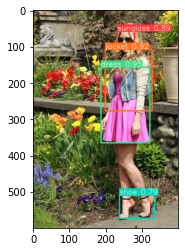

In [24]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show(figsize = (100,100))